In [1]:
import numpy as np

In [6]:
import sklearn as sk

In [7]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [21]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df.drop("deck", axis=1, inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.0+ KB


<Axes: xlabel='sex', ylabel='age'>

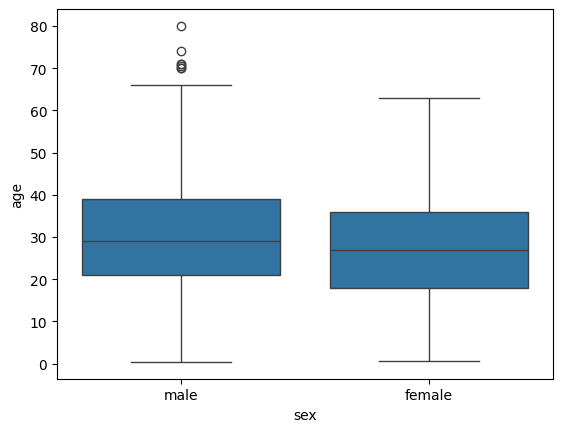

In [15]:
sns.boxplot(x='sex',y='age',data=df)

<Axes: xlabel='sex', ylabel='age'>

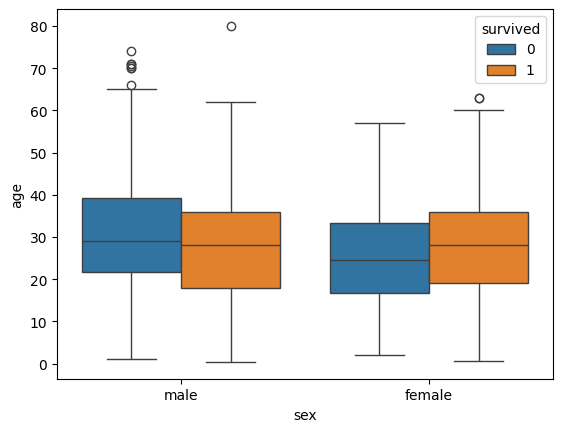

In [19]:
sns.boxplot(x='sex',y='age',hue='survived',data=df)

<Axes: xlabel='sex', ylabel='age'>

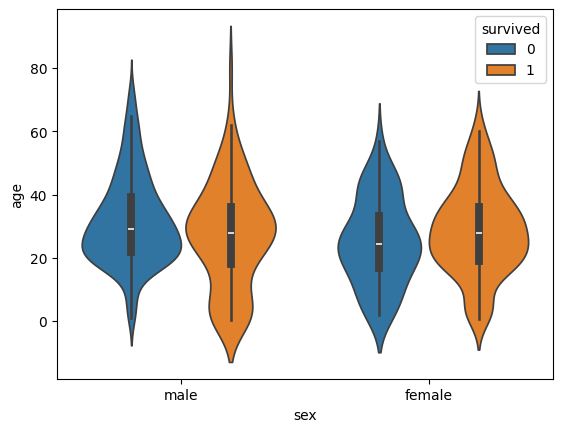

In [38]:
sns.violinplot(x='sex',y='age',data=df, hue='survived')

In [23]:
age_distinct = df[['sex','age']].dropna()
age_distinct.shape

(712, 2)

In [24]:
dataM = age_distinct[age_distinct['sex'] == 'male']
dataM.info()
dataM
data_female = age_distinct[age_distinct['sex'] == 'female']

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     453 non-null    object 
 1   age     453 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.6+ KB


In [26]:
data_male = dataM['age']
dataM = sorted(data_male)
dataM
q1 = np.percentile(dataM,25)
q3 = np.percentile(dataM,75)

IQR = q3 - q1
IQR
lwr = q1-(1.5*IQR)
upr = q3+(1.5*IQR)
print("Q1=",q1)
print("\nQ3=",q3)
print("\nIQR=",IQR)
print("Lower Bound:",lwr)
print("Upper Bound:",upr)

Q1= 21.0

Q3= 39.0

IQR= 18.0
Lower Bound: -6.0
Upper Bound: 66.0


In [34]:
data_male

0      22.0
4      35.0
6      54.0
7       2.0
12     20.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: age, Length: 453, dtype: float64

In [29]:
out = []
for i in dataM:
    if(i<lwr):
        print(i)
    if(i>=upr):
        print(i)

66.0
70.0
70.0
70.5
71.0
71.0
74.0
80.0


In [30]:
data_female= data_female['age']
data = sorted(data_female)
data
q1 = np.percentile(data,25)
q3 = np.percentile(data,75)

IQR = q3 - q1
IQR
lwr = q1-(1.5*IQR)
upr = q3+(1.5*IQR)
print("Q1=",q1)
print("\nQ3=",q3)
print("\nIQR=",IQR)
print("Lower Bound:",lwr)
print("Upper Bound:",upr)

Q1= 18.0

Q3= 36.0

IQR= 18.0
Lower Bound: -9.0
Upper Bound: 63.0


In [35]:
data_female

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
879    56.0
880    25.0
882    22.0
885    39.0
887    19.0
Name: age, Length: 259, dtype: float64

In [36]:
out = []
for i in data:
    if(i<lwr):
        print(i)
    if(i>=upr):
        print(i)

63.0
63.0


<Axes: xlabel='sex', ylabel='age'>

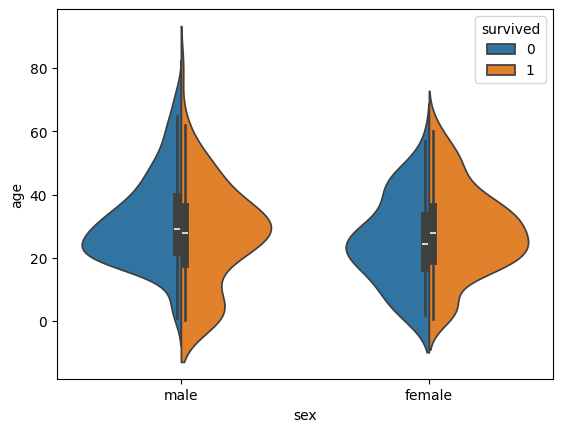

In [39]:
sns.violinplot(x='sex',y='age',data=df,hue='survived',split=True)

<Axes: xlabel='age', ylabel='sex'>

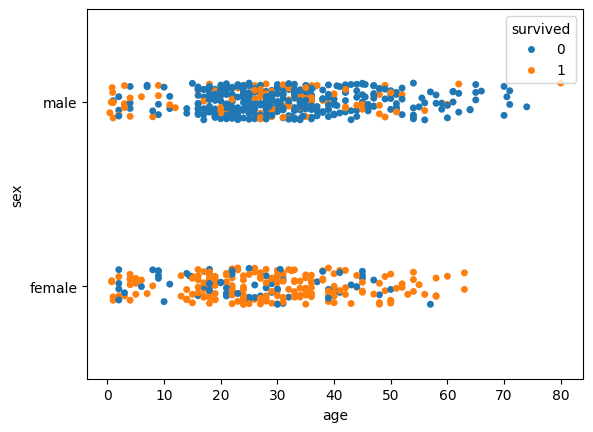

In [40]:
sns.stripplot(x='age',y='sex',data=df,hue='survived')

<Axes: xlabel='sex', ylabel='age'>

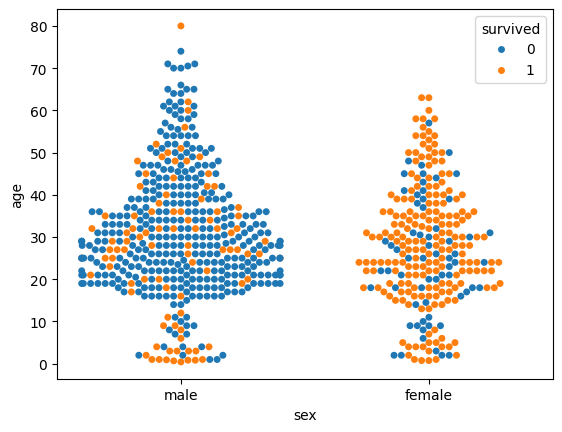

In [41]:
sns.swarmplot(x='sex',y='age',data=df,hue='survived')

<Axes: xlabel='age', ylabel='sex'>

/home/student/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


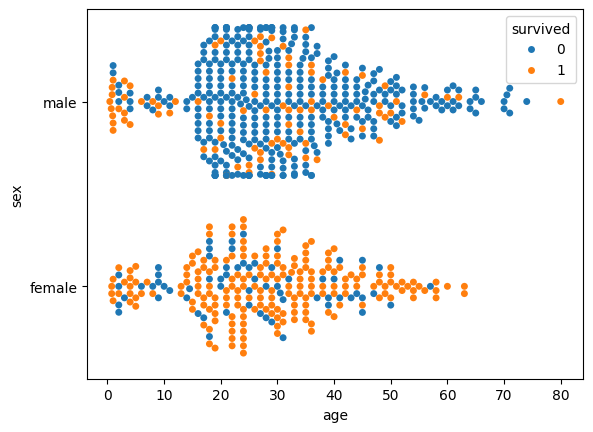

In [42]:
sns.swarmplot(x='age',y='sex',hue='survived',data=df)